In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:

row_sales = pd.read_csv("raw_sales.csv", date_parser=["datesold"])

row_sales.datesold = pd.to_datetime(row_sales.datesold)

In [17]:
row_sales["year"] = row_sales["datesold"].apply(lambda row: row.year)
row_sales["month"] = row_sales["datesold"].apply(lambda row: row.month)
row_sales["day"] = row_sales["datesold"].apply(lambda row: row.day)

In [18]:
row_sales.drop("datesold", inplace=True, axis=1)

In [19]:
row_sales.head()

,postcode,price,propertyType,bedrooms,year,month,day
0,2607,525000,house,4,2007,2,7
1,2906,290000,house,3,2007,2,27
2,2905,328000,house,3,2007,3,7
3,2905,380000,house,4,2007,3,9
4,2906,310000,house,3,2007,3,21


In [92]:
data = row_sales.groupby(["propertyType", "bedrooms", "year", "month"], as_index=False).agg({"price":"mean"})

In [93]:
from sklearn import preprocessing

property_type = preprocessing.LabelEncoder()
data["propertyType"] = property_type.fit_transform(data["propertyType"])

In [128]:
data.sort_values(["year", "month"])

,propertyType,year,month,price,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
211,0,2007,2,290000.000000,0,0,0,1,0,0
361,0,2007,2,525000.000000,0,0,0,0,1,0
212,0,2007,3,319000.000000,0,0,0,1,0,0
362,0,2007,3,380000.000000,0,0,0,0,1,0
213,0,2007,4,399000.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
651,0,2019,7,889538.461538,0,0,0,0,0,1
661,1,2019,7,199000.000000,1,0,0,0,0,0
794,1,2019,7,331261.904762,0,1,0,0,0,0
935,1,2019,7,423194.536585,0,0,1,0,0,0


In [94]:
data

,propertyType,bedrooms,year,month,price
0,0,0,2012,9,415000.0
1,0,0,2013,2,665000.0
2,0,0,2013,5,725000.0
3,0,0,2013,6,630000.0
4,0,0,2013,7,620000.0
...,...,...,...,...,...
1101,1,4,2018,7,300000.0
1102,1,4,2019,4,769500.0
1103,1,5,2014,5,1490000.0
1104,1,5,2014,7,729000.0


array([[<Axes: title={'center': 'propertyType'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

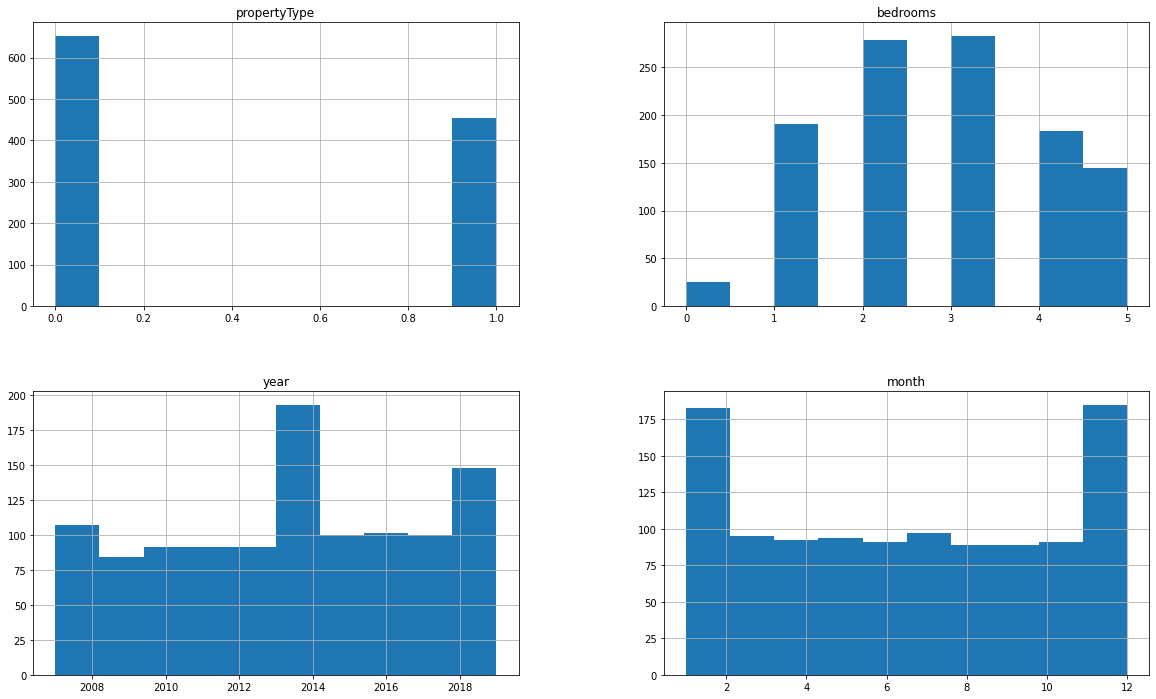

In [95]:
data.drop("price", axis=1).hist(figsize=(20, 12))

<Axes: >

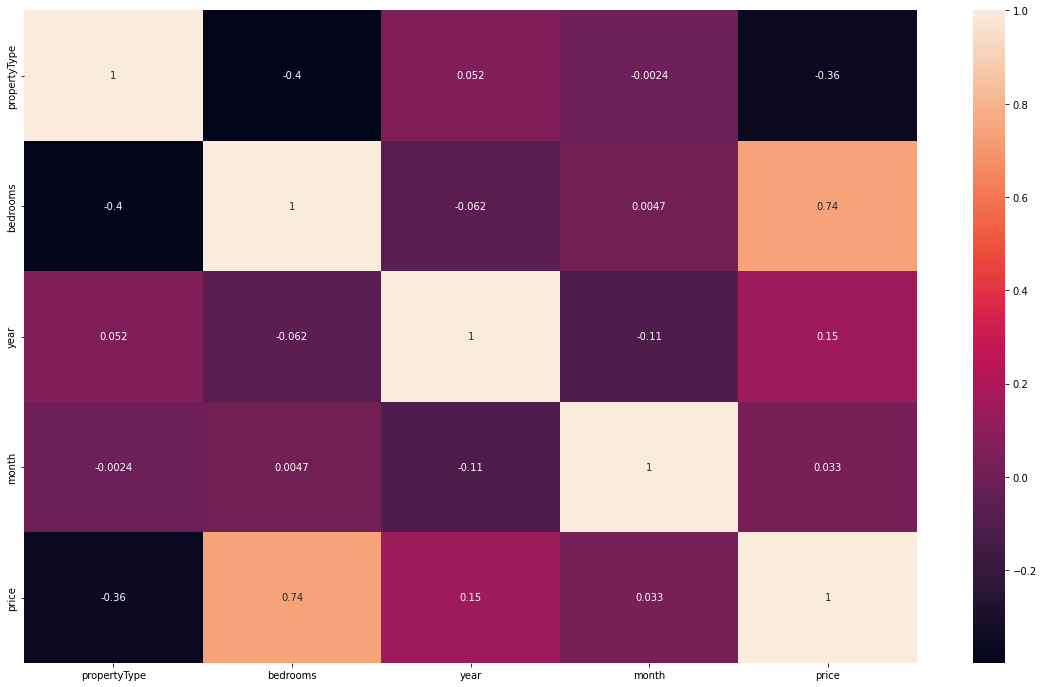

In [99]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True)

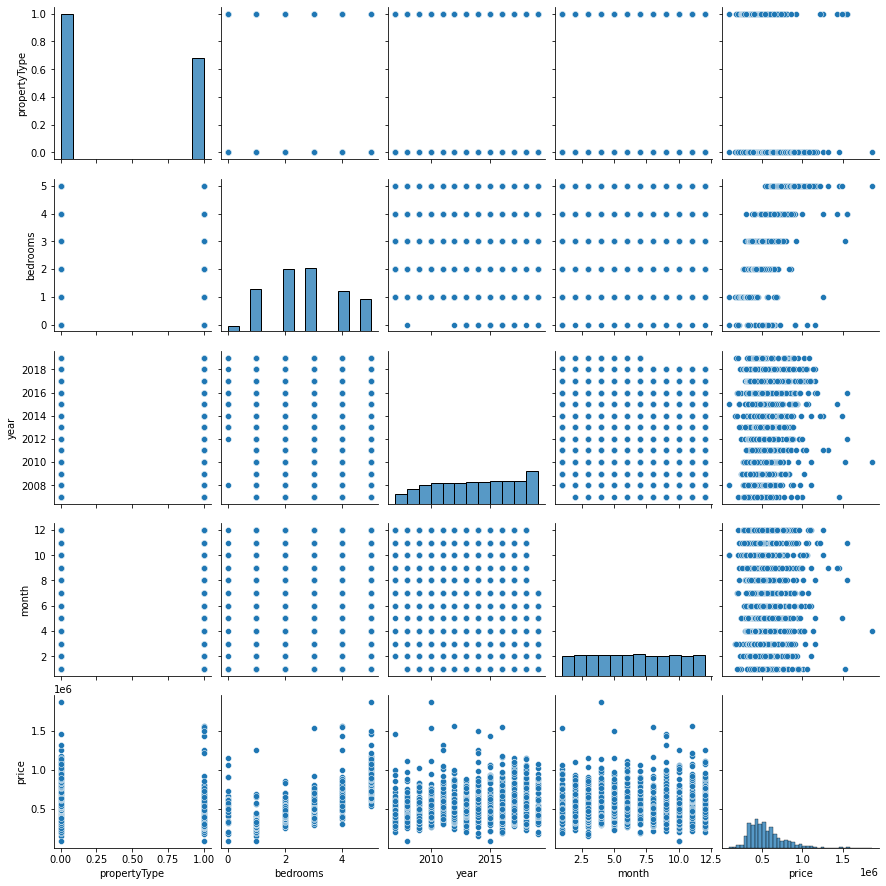

In [100]:
sns.pairplot(data)

In [75]:
one_hot = pd.get_dummies(data.bedrooms, prefix="bedrooms")

In [101]:
data = pd.concat([data, one_hot], axis=1)
data.drop("bedrooms", axis=1, inplace=True)

In [102]:
data.head()

,propertyType,year,month,price,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
0,0,2012,9,415000.0,1,0,0,0,0,0
1,0,2013,2,665000.0,1,0,0,0,0,0
2,0,2013,5,725000.0,1,0,0,0,0,0
3,0,2013,6,630000.0,1,0,0,0,0,0
4,0,2013,7,620000.0,1,0,0,0,0,0


In [78]:
X = data.drop("price", axis=1)
y = data["price"]

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [84]:
y_test

323    5.541787e+05
732    3.778571e+05
56     2.050000e+05
693    3.674750e+05
485    8.974255e+05
           ...     
620    1.073897e+06
435    6.376019e+05
429    6.802244e+05
536    7.932143e+05
350    6.311207e+05
Name: price, Length: 365, dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_reg = model_regression.predict(X_test)

print_metrics(y_test, y_pred_reg)

MAE: 69880.97924311731
RMSE: 97474.20303156732
R2: 0.7487086698599068
MAPE: 14.064504177187473


<Axes: xlabel='feature'>

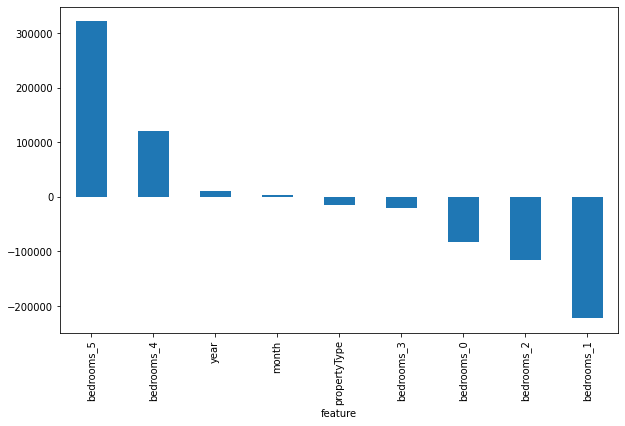

In [104]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6))

In [105]:
from sklearn.linear_model import Lasso

model_simplelasso = Lasso()
model_simplelasso.fit(X_train, y_train)
y_pred_lasso = model_simplelasso.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.179e+10, tolerance: 3.484e+09
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='feature'>

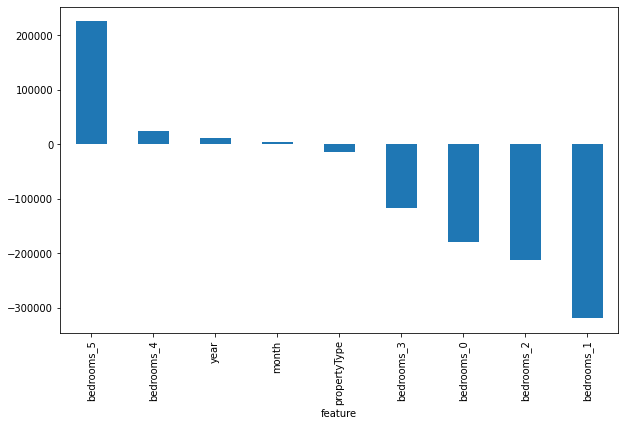

In [106]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6))

In [107]:
print_metrics(y_test, y_pred_lasso)

MAE: 69880.35553253407
RMSE: 97472.93933026562
R2: 0.7487151855350833
MAPE: 14.064429814010204


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}
model_lasso = Lasso() 

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)

y_pred_lasso = grid_cv_lasso.predict(X_test)

In [109]:
print_metrics(y_test, y_pred_lasso)

MAE: 69880.97861940597
RMSE: 97474.20176770243
R2: 0.7487086763764677
MAPE: 14.064504102824024


In [111]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

y_pred_lasso_cv = lasso_cv.predict(X_test)

print_metrics(y_test, y_pred_lasso_cv)

MAE: 69814.5103646533
RMSE: 97332.09654964277
R2: 0.7494408450420534
MAPE: 14.06053998907165


In [115]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_cv(model, param_grid, x_train, y_train):
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    print('best accuracy score is {}'.format(grid_search.best_score_))
    print(grid_search.best_score_)
    return grid_search.best_estimator_

In [116]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
param_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.025]
}
xgb = randomized_cv(xgb.XGBRegressor(), param_grid, X_train, y_train)

In [119]:
y_pred_xgb = xgb.predict(X_test)

print_metrics(y_test, y_pred_xgb)

MAE: 68250.07652543795
RMSE: 101079.17995564108
R2: 0.729777480511015
MAPE: 12.377367090237865


In [ ]:
import lightgbm as lgb

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.02, 0.05]
}
model = randomized_cv(lgb.LGBMRegressor(), param_grid, X_train, y_train)

In [122]:
y_pred_lgb = model.predict(X_test)

print_metrics(y_test, y_pred_lgb)

MAE: 112352.9979725959
RMSE: 140907.86502068213
R2: 0.4748678732355692
MAPE: 23.86773013970697


In [124]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catReg = CatBoostRegressor(eval_metric="MAE")
catReg.fit(X_train, y_train)

y_pred_catReg = catReg.predict(X_test)

print_metrics(y_test, y_pred_catReg)

In [127]:
print_metrics(y_test, y_pred_catReg)

MAE: 65713.78341722021
RMSE: 107716.92309040915
R2: 0.6931218283957294
MAPE: 13.24015352249126


In [131]:
test_dates = pd.date_range(start='8/1/2019', periods=12, freq="M")

In [137]:
test_dates[0]

Timestamp('2019-08-31 00:00:00', freq='M')

In [145]:
badrooms = [0, 1, 2, 3, 4, 5]
types = ['house', 'unit']
unique_combinations = []

propertyType = []
bedrooms = []
dates = []

for k in range(len(test_dates)):
  for i in range(len(types)):
    for j in range(len(badrooms)):
      dates.append(test_dates[k])
      propertyType.append(types[i])
      bedrooms.append(badrooms[j])

test_data = pd.DataFrame({"dates":dates, "propertyType":propertyType, "bedrooms":bedrooms})
test_data.propertyType = property_type.transform(test_data.propertyType)
test_data["year"] = test_data["dates"].apply(lambda row: row.year)
test_data["month"] = test_data["dates"].apply(lambda row: row.month)

one_hot = pd.get_dummies(test_data.bedrooms, prefix="bedrooms")

test_data = pd.concat([test_data, one_hot], axis=1)

test_data.head()

,dates,propertyType,bedrooms,year,month,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
0,2019-08-31,0,0,2019,8,1,0,0,0,0,0
1,2019-08-31,0,1,2019,8,0,1,0,0,0,0
2,2019-08-31,0,2,2019,8,0,0,1,0,0,0
3,2019-08-31,0,3,2019,8,0,0,0,1,0,0
4,2019-08-31,0,4,2019,8,0,0,0,0,1,0


In [148]:
test_data.drop(["dates", "bedrooms"], axis=1, inplace=True)

In [151]:
test_data["price"] = catReg.predict(test_data)

In [153]:
test_data

,propertyType,year,month,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,price
0,0,2019,8,1,0,0,0,0,0,519097.880991
1,0,2019,8,0,1,0,0,0,0,294943.578865
2,0,2019,8,0,0,1,0,0,0,466116.717780
3,0,2019,8,0,0,0,1,0,0,560998.591553
4,0,2019,8,0,0,0,0,1,0,731789.626962
...,...,...,...,...,...,...,...,...,...,...
139,1,2020,7,0,1,0,0,0,0,302797.504724
140,1,2020,7,0,0,1,0,0,0,403419.206376
141,1,2020,7,0,0,0,1,0,0,545650.687137
142,1,2020,7,0,0,0,0,1,0,742856.469232
